KNN Accuracy: 93.33%


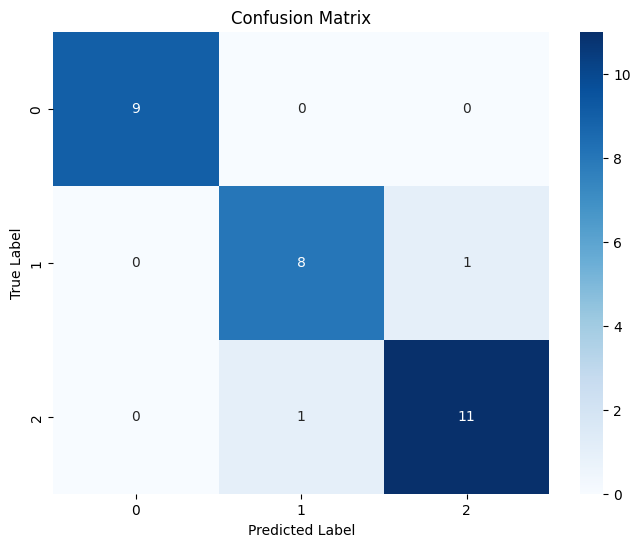

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from collections import Counter

# Load dataset
df = pd.read_csv("Iris.csv")

if 'Id' in df.columns:
    df = df.drop(columns=['Id'])

# Convert class labels to numerical values
df['Species'] = df['Species'].astype('category').cat.codes

data = df.values

np.random.shuffle(data)
split_ratio = 0.8
split = int(len(data) * split_ratio)
train_data, test_data = data[:split], data[split:]

X_train, y_train = train_data[:, :-1], train_data[:, -1]
X_test, y_test = test_data[:, :-1], test_data[:, -1]

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def knn_predict(X_train, y_train, X_test, k=3):
    predictions = []
    for test_point in X_test:
        distances = [(euclidean_distance(test_point, train_point), label)
                     for train_point, label in zip(X_train, y_train)]
        distances.sort(key=lambda x: x[0])
        k_nearest_labels = [label for _, label in distances[:k]]
        most_common = Counter(k_nearest_labels).most_common(1)[0][0]
        predictions.append(most_common)
    return np.array(predictions)

k = 5
y_pred = knn_predict(X_train, y_train, X_test, k)

accuracy = np.sum(y_pred == y_test) / len(y_test)
print(f"KNN Accuracy: {accuracy * 100:.2f}%")

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=df['Species'].unique(), yticklabels=df['Species'].unique())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
